In [1]:
#loading our libraries for our dataset
import pandas as pd #data manipulation
import numpy as np  #numerical computation
import matplotlib.pyplot as plt #data visualisation
import mailbox #

In [2]:
#loading our dataset
mboxfile="All mail Including spam and Trash.mbox"
mbox=mailbox.mbox(mboxfile)
mbox

In [3]:
#rows or keys in out email
for key in mbox[0].keys():
    print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
DKIM-Signature
X-Google-DKIM-Signature
X-Gm-Message-State
X-Google-Smtp-Source
MIME-Version
X-Received
Date
Reply-To
X-Google-Id
Precedence
List-Unsubscribe
Feedback-ID
List-Id
X-Notifications
X-Notifications-Bounce-Info
Message-ID
Subject
From
To
Content-Type


# data transformation

In [4]:
import csv

In [5]:
with open('mailbox.csv', 'w') as outputfile:
    writer=csv.writer(outputfile)
    writer.writerow(["subject","from","date","to","label","thread"])
    for message in mbox:
        writer.writerow([
            message["subject"],
            message["from"],
            message["date"],
            message["to"],
            message["X-Gmail-Labels"],
            message["X-GM-THRID"],
        ])

In [6]:
dfs=pd.read_csv("mailbox.csv")

In [7]:
dfs.head()

,subject,from,date,to,label,thread
0,"Dorcas, plan fun get-togethers with Google","""Google Tips & Updates"" <googlecommunityteam-n...","Thu, 13 Jul 2023 09:16:01 -0700",hoseadorcas241@gmail.com,"Inbox,Category updates,Unread",1771322697187038003
1,=?UTF-8?q?Trending_AI_Content_=F0=9F=93=88?=,DataCamp <team@datacamp.com>,"Mon, 31 Jul 2023 19:39:28 +0000",hoseadorcas241@gmail.com,"Inbox,Category promotions,Unread",1772966242087974305
2,African Braids for Hoseadorcas,"""=?utf-8?q?Pinterest?="" <pinterest-recommendat...","Tue, 08 Aug 2023 06:54:37 +0000","""Hoseadorcas"" <hoseadorcas241@gmail.com>","Inbox,Category promotions,Unread",1773642897684053958
3,Critical security alert,Google <no-reply@accounts.google.com>,"Wed, 26 Jul 2023 13:25:39 GMT",hoseadorcas241@gmail.com,"Inbox,Category updates,Unread",1772491626425746422
4,On a mobile device? We got you covered,DataCamp <team@datacamp.com>,"Wed, 09 Aug 2023 12:58:22 +0000",hoseadorcas241@gmail.com,"Inbox,Category promotions,Unread",1773756379747392438


In [8]:
dfs.dtypes

subject    object
from       object
date       object
to         object
label      object
thread      int64
dtype: object

# converting date

In [9]:
dfs['date'].head()

0    Thu, 13 Jul 2023 09:16:01 -0700
1    Mon, 31 Jul 2023 19:39:28 +0000
2    Tue, 08 Aug 2023 06:54:37 +0000
3      Wed, 26 Jul 2023 13:25:39 GMT
4    Wed, 09 Aug 2023 12:58:22 +0000
Name: date, dtype: object

In [10]:
dfs['date'] = dfs['date'].apply(lambda x: pd.to_datetime(x,
errors='coerce', utc=True))


In [11]:
dfs["date"]=dfs["date"].apply(lambda x: pd.to_datetime(x),)

In [12]:
dfs['date'].head()

0   2023-07-13 16:16:01+00:00
1   2023-07-31 19:39:28+00:00
2   2023-08-08 06:54:37+00:00
3   2023-07-26 13:25:39+00:00
4   2023-08-09 12:58:22+00:00
Name: date, dtype: datetime64[ns, UTC]

In [13]:
dfs.head()

,subject,from,date,to,label,thread
0,"Dorcas, plan fun get-togethers with Google","""Google Tips & Updates"" <googlecommunityteam-n...",2023-07-13 16:16:01+00:00,hoseadorcas241@gmail.com,"Inbox,Category updates,Unread",1771322697187038003
1,=?UTF-8?q?Trending_AI_Content_=F0=9F=93=88?=,DataCamp <team@datacamp.com>,2023-07-31 19:39:28+00:00,hoseadorcas241@gmail.com,"Inbox,Category promotions,Unread",1772966242087974305
2,African Braids for Hoseadorcas,"""=?utf-8?q?Pinterest?="" <pinterest-recommendat...",2023-08-08 06:54:37+00:00,"""Hoseadorcas"" <hoseadorcas241@gmail.com>","Inbox,Category promotions,Unread",1773642897684053958
3,Critical security alert,Google <no-reply@accounts.google.com>,2023-07-26 13:25:39+00:00,hoseadorcas241@gmail.com,"Inbox,Category updates,Unread",1772491626425746422
4,On a mobile device? We got you covered,DataCamp <team@datacamp.com>,2023-08-09 12:58:22+00:00,hoseadorcas241@gmail.com,"Inbox,Category promotions,Unread",1773756379747392438


In [14]:
dfs['date'].isnull().sum()

0

In [15]:
dfs.head()

,subject,from,date,to,label,thread
0,"Dorcas, plan fun get-togethers with Google","""Google Tips & Updates"" <googlecommunityteam-n...",2023-07-13 16:16:01+00:00,hoseadorcas241@gmail.com,"Inbox,Category updates,Unread",1771322697187038003
1,=?UTF-8?q?Trending_AI_Content_=F0=9F=93=88?=,DataCamp <team@datacamp.com>,2023-07-31 19:39:28+00:00,hoseadorcas241@gmail.com,"Inbox,Category promotions,Unread",1772966242087974305
2,African Braids for Hoseadorcas,"""=?utf-8?q?Pinterest?="" <pinterest-recommendat...",2023-08-08 06:54:37+00:00,"""Hoseadorcas"" <hoseadorcas241@gmail.com>","Inbox,Category promotions,Unread",1773642897684053958
3,Critical security alert,Google <no-reply@accounts.google.com>,2023-07-26 13:25:39+00:00,hoseadorcas241@gmail.com,"Inbox,Category updates,Unread",1772491626425746422
4,On a mobile device? We got you covered,DataCamp <team@datacamp.com>,2023-08-09 12:58:22+00:00,hoseadorcas241@gmail.com,"Inbox,Category promotions,Unread",1773756379747392438


In [16]:
#dfs=dfs[dfs["date"].notna()]

In [17]:
dfs.to_csv("gmail.csv")

In [18]:
dfs.head()

,subject,from,date,to,label,thread
0,"Dorcas, plan fun get-togethers with Google","""Google Tips & Updates"" <googlecommunityteam-n...",2023-07-13 16:16:01+00:00,hoseadorcas241@gmail.com,"Inbox,Category updates,Unread",1771322697187038003
1,=?UTF-8?q?Trending_AI_Content_=F0=9F=93=88?=,DataCamp <team@datacamp.com>,2023-07-31 19:39:28+00:00,hoseadorcas241@gmail.com,"Inbox,Category promotions,Unread",1772966242087974305
2,African Braids for Hoseadorcas,"""=?utf-8?q?Pinterest?="" <pinterest-recommendat...",2023-08-08 06:54:37+00:00,"""Hoseadorcas"" <hoseadorcas241@gmail.com>","Inbox,Category promotions,Unread",1773642897684053958
3,Critical security alert,Google <no-reply@accounts.google.com>,2023-07-26 13:25:39+00:00,hoseadorcas241@gmail.com,"Inbox,Category updates,Unread",1772491626425746422
4,On a mobile device? We got you covered,DataCamp <team@datacamp.com>,2023-08-09 12:58:22+00:00,hoseadorcas241@gmail.com,"Inbox,Category promotions,Unread",1773756379747392438


In [19]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  73 non-null     object             
 1   from     74 non-null     object             
 2   date     74 non-null     datetime64[ns, UTC]
 3   to       74 non-null     object             
 4   label    74 non-null     object             
 5   thread   74 non-null     int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 3.6+ KB


In [20]:
dfs.head(10)

,subject,from,date,to,label,thread
0,"Dorcas, plan fun get-togethers with Google","""Google Tips & Updates"" <googlecommunityteam-n...",2023-07-13 16:16:01+00:00,hoseadorcas241@gmail.com,"Inbox,Category updates,Unread",1771322697187038003
1,=?UTF-8?q?Trending_AI_Content_=F0=9F=93=88?=,DataCamp <team@datacamp.com>,2023-07-31 19:39:28+00:00,hoseadorcas241@gmail.com,"Inbox,Category promotions,Unread",1772966242087974305
2,African Braids for Hoseadorcas,"""=?utf-8?q?Pinterest?="" <pinterest-recommendat...",2023-08-08 06:54:37+00:00,"""Hoseadorcas"" <hoseadorcas241@gmail.com>","Inbox,Category promotions,Unread",1773642897684053958
3,Critical security alert,Google <no-reply@accounts.google.com>,2023-07-26 13:25:39+00:00,hoseadorcas241@gmail.com,"Inbox,Category updates,Unread",1772491626425746422
4,On a mobile device? We got you covered,DataCamp <team@datacamp.com>,2023-08-09 12:58:22+00:00,hoseadorcas241@gmail.com,"Inbox,Category promotions,Unread",1773756379747392438
5,=?utf-8?Q?=f0=9f=93=84_New_messages_from_=32_c...,Slack <no-reply@slack.com>,2023-06-28 10:35:43+00:00,""""" <hoseadorcas241@gmail.com>","Inbox,Category updates,Unread",1769942333700725609
6,Learn more about Python Lists,The DataCamp Team <team@datacamp.com>,2023-07-28 17:13:11+00:00,hoseadorcas241@gmail.com,"Inbox,Category promotions,Unread",1772685248914647025
7,=?utf-8?Q?On-Call=20Code=20Examples=20-=20So=2...,Grepper <support@codegrepper.com>,2023-07-31 14:23:14+00:00,hoseadorcas241@gmail.com,"Inbox,Category updates,Unread",1772946345596592454
8,=?utf-8?Q?Slack_confirmation_code=3a_GO=37=2dK...,Slack <no-reply-Cgu6IFFHwKN143KXanlunWdn@slack...,2023-07-03 14:03:29+00:00,""""" <hoseadorcas241@gmail.com>","Inbox,Important,Category promotions,Unread",1770408389179960679
9,CoLab on Slack: New Account Details,Slack <no-reply-aa56xceC3LOl26kfLABQT6x5@slack...,2023-06-26 12:26:42+00:00,""""" <hoseadorcas241@gmail.com>","Inbox,Important,Category promotions,Unread",1769768122111488807


# data refactoring

In [21]:
dfs["from"]

0     "Google Tips & Updates" <googlecommunityteam-n...
1                          DataCamp <team@datacamp.com>
2     "=?utf-8?q?Pinterest?=" <pinterest-recommendat...
3                 Google <no-reply@accounts.google.com>
4                          DataCamp <team@datacamp.com>
                            ...                        
69                         DataCamp <team@datacamp.com>
70                         DataCamp <team@datacamp.com>
71                       Slack <notification@slack.com>
72                       Slack <notification@slack.com>
73    TSAKU CHRISTOPHER MOSES <tsakumoses4ril@gmail....
Name: from, Length: 74, dtype: object

In [22]:
import re

In [23]:
def extract_email_ID(string):
    email=re.findall(r'<(.+?)>', string)
    if not email:
        email=list(filter(lambda y:"@" in y,string.split()))
    return email[0]if email else np.nan

In [24]:
dfs["from"]=dfs["from"].apply(lambda x: extract_email_ID(x))

In [25]:
dfs.head()

,subject,from,date,to,label,thread
0,"Dorcas, plan fun get-togethers with Google",googlecommunityteam-noreply@google.com,2023-07-13 16:16:01+00:00,hoseadorcas241@gmail.com,"Inbox,Category updates,Unread",1771322697187038003
1,=?UTF-8?q?Trending_AI_Content_=F0=9F=93=88?=,team@datacamp.com,2023-07-31 19:39:28+00:00,hoseadorcas241@gmail.com,"Inbox,Category promotions,Unread",1772966242087974305
2,African Braids for Hoseadorcas,pinterest-recommendations@ideas.pinterest.com,2023-08-08 06:54:37+00:00,"""Hoseadorcas"" <hoseadorcas241@gmail.com>","Inbox,Category promotions,Unread",1773642897684053958
3,Critical security alert,no-reply@accounts.google.com,2023-07-26 13:25:39+00:00,hoseadorcas241@gmail.com,"Inbox,Category updates,Unread",1772491626425746422
4,On a mobile device? We got you covered,team@datacamp.com,2023-08-09 12:58:22+00:00,hoseadorcas241@gmail.com,"Inbox,Category promotions,Unread",1773756379747392438


In [26]:
myemail = "hoseadorcas241@gmail.com"
dfs['label'] = dfs['from'].apply(lambda x: 'sent' if x==myemail
else 'inbox')


In [27]:
dfs.head()

,subject,from,date,to,label,thread
0,"Dorcas, plan fun get-togethers with Google",googlecommunityteam-noreply@google.com,2023-07-13 16:16:01+00:00,hoseadorcas241@gmail.com,inbox,1771322697187038003
1,=?UTF-8?q?Trending_AI_Content_=F0=9F=93=88?=,team@datacamp.com,2023-07-31 19:39:28+00:00,hoseadorcas241@gmail.com,inbox,1772966242087974305
2,African Braids for Hoseadorcas,pinterest-recommendations@ideas.pinterest.com,2023-08-08 06:54:37+00:00,"""Hoseadorcas"" <hoseadorcas241@gmail.com>",inbox,1773642897684053958
3,Critical security alert,no-reply@accounts.google.com,2023-07-26 13:25:39+00:00,hoseadorcas241@gmail.com,inbox,1772491626425746422
4,On a mobile device? We got you covered,team@datacamp.com,2023-08-09 12:58:22+00:00,hoseadorcas241@gmail.com,inbox,1773756379747392438


In [28]:
dfs.drop(columns='to', inplace=True)


In [29]:
dfs.head(10)

,subject,from,date,label,thread
0,"Dorcas, plan fun get-togethers with Google",googlecommunityteam-noreply@google.com,2023-07-13 16:16:01+00:00,inbox,1771322697187038003
1,=?UTF-8?q?Trending_AI_Content_=F0=9F=93=88?=,team@datacamp.com,2023-07-31 19:39:28+00:00,inbox,1772966242087974305
2,African Braids for Hoseadorcas,pinterest-recommendations@ideas.pinterest.com,2023-08-08 06:54:37+00:00,inbox,1773642897684053958
3,Critical security alert,no-reply@accounts.google.com,2023-07-26 13:25:39+00:00,inbox,1772491626425746422
4,On a mobile device? We got you covered,team@datacamp.com,2023-08-09 12:58:22+00:00,inbox,1773756379747392438
5,=?utf-8?Q?=f0=9f=93=84_New_messages_from_=32_c...,no-reply@slack.com,2023-06-28 10:35:43+00:00,inbox,1769942333700725609
6,Learn more about Python Lists,team@datacamp.com,2023-07-28 17:13:11+00:00,inbox,1772685248914647025
7,=?utf-8?Q?On-Call=20Code=20Examples=20-=20So=2...,support@codegrepper.com,2023-07-31 14:23:14+00:00,inbox,1772946345596592454
8,=?utf-8?Q?Slack_confirmation_code=3a_GO=37=2dK...,no-reply-Cgu6IFFHwKN143KXanlunWdn@slack.com,2023-07-03 14:03:29+00:00,inbox,1770408389179960679
9,CoLab on Slack: New Account Details,no-reply-aa56xceC3LOl26kfLABQT6x5@slack.com,2023-06-26 12:26:42+00:00,inbox,1769768122111488807


# refactoring time zone

In [30]:
import datetime
import pytz

In [31]:
#pytz.all_timezones

In [32]:
def refactor_timezone(x):
    est = pytz.timezone('Africa/Lagos')
    return x.astimezone(est)

In [33]:
dfs['date'].head()

0   2023-07-13 16:16:01+00:00
1   2023-07-31 19:39:28+00:00
2   2023-08-08 06:54:37+00:00
3   2023-07-26 13:25:39+00:00
4   2023-08-09 12:58:22+00:00
Name: date, dtype: datetime64[ns, UTC]

In [34]:
dfs['date'] = dfs['date'].apply(lambda x: refactor_timezone(x))

In [35]:
dfs['date'].head()

0   2023-07-13 17:16:01+01:00
1   2023-07-31 20:39:28+01:00
2   2023-08-08 07:54:37+01:00
3   2023-07-26 14:25:39+01:00
4   2023-08-09 13:58:22+01:00
Name: date, dtype: datetime64[ns, Africa/Lagos]

In [36]:
# dfs['day of week'] = dfs['date'].apply(lambda x: x.strftime('%A'))
# dfs['day of week'] = pd.Categorical(dfs['day of week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

In [37]:
dfs['dayofweek'] = dfs['date'].apply(lambda x: x.day_name())

In [38]:
dfs[['date','dayofweek']].head()

,date,dayofweek
0,2023-07-13 17:16:01+01:00,Thursday
1,2023-07-31 20:39:28+01:00,Monday
2,2023-08-08 07:54:37+01:00,Tuesday
3,2023-07-26 14:25:39+01:00,Wednesday
4,2023-08-09 13:58:22+01:00,Wednesday


In [39]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype                       
---  ------     --------------  -----                       
 0   subject    73 non-null     object                      
 1   from       74 non-null     object                      
 2   date       74 non-null     datetime64[ns, Africa/Lagos]
 3   label      74 non-null     object                      
 4   thread     74 non-null     int64                       
 5   dayofweek  74 non-null     object                      
dtypes: datetime64[ns, Africa/Lagos](1), int64(1), object(4)
memory usage: 3.6+ KB


In [40]:
dfs['dayofweek'] = dfs.dayofweek.astype('category')

In [42]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype                       
---  ------     --------------  -----                       
 0   subject    73 non-null     object                      
 1   from       74 non-null     object                      
 2   date       74 non-null     datetime64[ns, Africa/Lagos]
 3   label      74 non-null     object                      
 4   thread     74 non-null     int64                       
 5   dayofweek  74 non-null     category                    
dtypes: category(1), datetime64[ns, Africa/Lagos](1), int64(1), object(3)
memory usage: 3.4+ KB


In [43]:
dfs['timeofday'] = dfs['date'].apply(lambda x: x.hour + x.minute/60
+ x.second/3600)

In [44]:
dfs['hour'] = dfs['date'].apply(lambda x: x.hour)


In [45]:
# dfs['year_int'] = dfs['date'].apply(lambda x: x.year)

In [46]:
dfs["year"]=dfs["date"].apply(lambda x:x.year + x.dayofyear/365.25)

In [47]:
dfs.index =dfs['date']
del dfs['date']

In [48]:
dfs.head()

,subject,from,label,thread,dayofweek,timeofday,hour,year
date,,,,,,,,
2023-07-13 17:16:01+01:00,"Dorcas, plan fun get-togethers with Google",googlecommunityteam-noreply@google.com,inbox,1771322697187038003,Thursday,17.266944,17,2023.531143
2023-07-31 20:39:28+01:00,=?UTF-8?q?Trending_AI_Content_=F0=9F=93=88?=,team@datacamp.com,inbox,1772966242087974305,Monday,20.657778,20,2023.580424
2023-08-08 07:54:37+01:00,African Braids for Hoseadorcas,pinterest-recommendations@ideas.pinterest.com,inbox,1773642897684053958,Tuesday,7.910278,7,2023.602327
2023-07-26 14:25:39+01:00,Critical security alert,no-reply@accounts.google.com,inbox,1772491626425746422,Wednesday,14.427500,14,2023.566735
2023-08-09 13:58:22+01:00,On a mobile device? We got you covered,team@datacamp.com,inbox,1773756379747392438,Wednesday,13.972778,13,2023.605065


In [66]:
dfs.loc["2023"]

,subject,from,label,thread,dayofweek,timeofday,hour,year
date,,,,,,,,
2023-07-13 17:16:01+01:00,"Dorcas, plan fun get-togethers with Google",googlecommunityteam-noreply@google.com,inbox,1771322697187038003,Thursday,17.266944,17,2023.531143
2023-07-31 20:39:28+01:00,=?UTF-8?q?Trending_AI_Content_=F0=9F=93=88?=,team@datacamp.com,inbox,1772966242087974305,Monday,20.657778,20,2023.580424
2023-08-08 07:54:37+01:00,African Braids for Hoseadorcas,pinterest-recommendations@ideas.pinterest.com,inbox,1773642897684053958,Tuesday,7.910278,7,2023.602327
2023-07-26 14:25:39+01:00,Critical security alert,no-reply@accounts.google.com,inbox,1772491626425746422,Wednesday,14.427500,14,2023.566735
2023-08-09 13:58:22+01:00,On a mobile device? We got you covered,team@datacamp.com,inbox,1773756379747392438,Wednesday,13.972778,13,2023.605065
...,...,...,...,...,...,...,...,...
2023-08-02 15:06:21+01:00,50% Off: Ends soon!,team@datacamp.com,inbox,1773126479423854507,Wednesday,15.105833,15,2023.585900
2023-07-31 12:50:18+01:00,"Dorcas, don't get left behind",team@datacamp.com,inbox,1772936724835629352,Monday,12.838333,12,2023.580424
2023-08-10 17:23:55+01:00,=?utf-8?Q?=5bSlack=5d_New_messages_from_Gideon...,notification@slack.com,inbox,1773859910185209994,Thursday,17.398611,17,2023.607803


# data analysis 
# how many email did i send during a time frame
# at wat time of the day do i receive data
# what is the average of email perday 
# what is the average of email perhour
# whom do i communicate with most frequently
# what are the most  active emailing days
# what am i mostly email about

# 1 numbers of email

In [49]:
print(dfs.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs.index.max().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs['label'].value_counts())

Mon, 26 Jun 2023 01:21 PM
Mon, 14 Aug 2023 01:54 PM
inbox    73
sent      1
Name: label, dtype: int64


In [50]:
sent = dfs[dfs['label']=='sent']
received = dfs[dfs['label']=='inbox']


# time of day

In [51]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy import ndimage
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

In [52]:
def plot_todo_vs_year(df, ax, color='C0', s=20, title=''):
    ind = np.zeros(len(df), dtype='bool')
    est = pytz.timezone('Africa/Lagos')
    df[~ind].plot.scatter('year', 'timeofday', s=s, alpha=0.6, ax=ax, color=color)
    ax.set_ylim(0, 24)
    ax.yaxis.set_major_locator(MaxNLocator(8))
    ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
    ax.set_xlim(2020, 2025)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)
    ax.grid(ls=':', color='k')
    return ax


C:\Users\MELISA\AppData\Local\Temp\ipykernel_5340\1962557207.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);


<Axes: title={'center': 'Received'}>

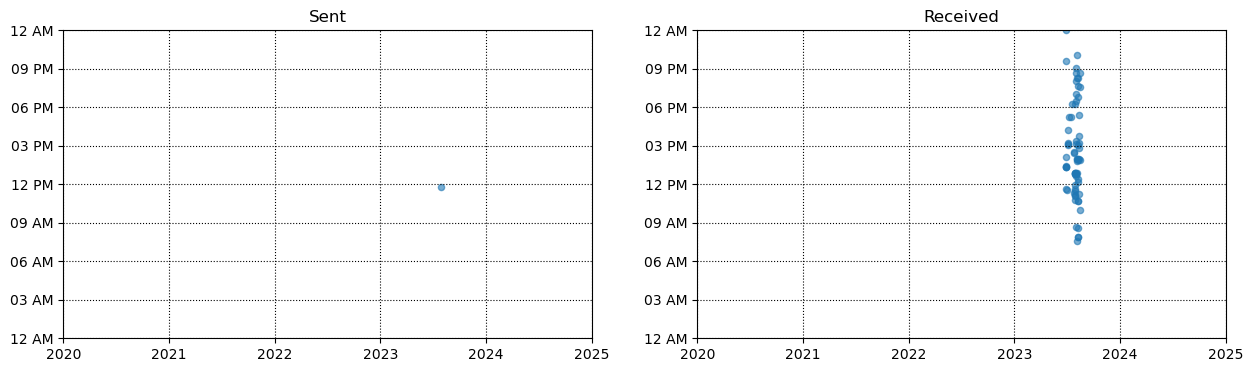

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
plot_todo_vs_year(sent, ax[0], title='Sent')
plot_todo_vs_year(received, ax[1], title='Received')

In [54]:
dfs['label'].value_counts()

inbox    73
sent      1
Name: label, dtype: int64

In [55]:
dfs["subject"].unique()

array(['Dorcas, plan fun get-togethers with Google ',
       '=?UTF-8?q?Trending_AI_Content_=F0=9F=93=88?=',
       'African Braids for Hoseadorcas', 'Critical security alert',
       'On a mobile device? We got you covered',
       '=?utf-8?Q?=f0=9f=93=84_New_messages_from_=32_conversations_in_CoLab?=',
       'Learn more about Python Lists',
       '=?utf-8?Q?On-Call=20Code=20Examples=20-=20So=20What=20is=20Grepper=20Anyway=3F?=',
       '=?utf-8?Q?Slack_confirmation_code=3a_GO=37=2dKAF?=',
       'CoLab on Slack: New Account Details',
       'Please verify your email address',
       'Hoseadorcas, these ideas are so you', 'Last Chance: 50% Off',
       '=?UTF-8?Q?=E2=9C=85_Dorcas=2C_finish_setting_up_your_Gionee_F103B_devi?=\r\n\t=?UTF-8?Q?ce_with_Google?=',
       'Please confirm your email',
       '=?utf-8?Q?=5bSlack=5d_Moze=2e_sent_you_a_message?=',
       '=?utf-8?Q?=5bSlack=5d_New_messages_from_Pablo_and_Slackbot_in_CoLab?=',
       "Get certified and prove you're job-ready!",

# number of email perday

<Axes: >

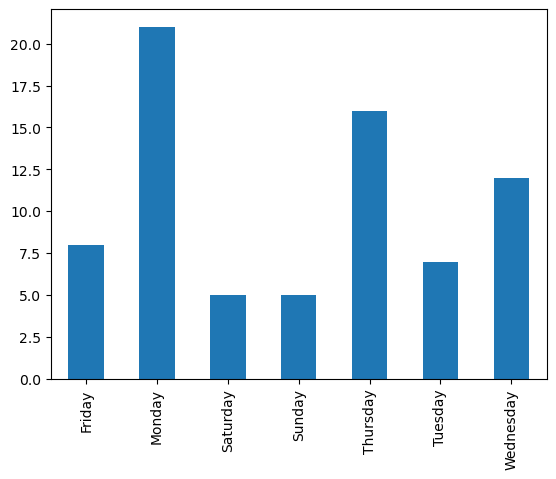

In [56]:
counts = dfs.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

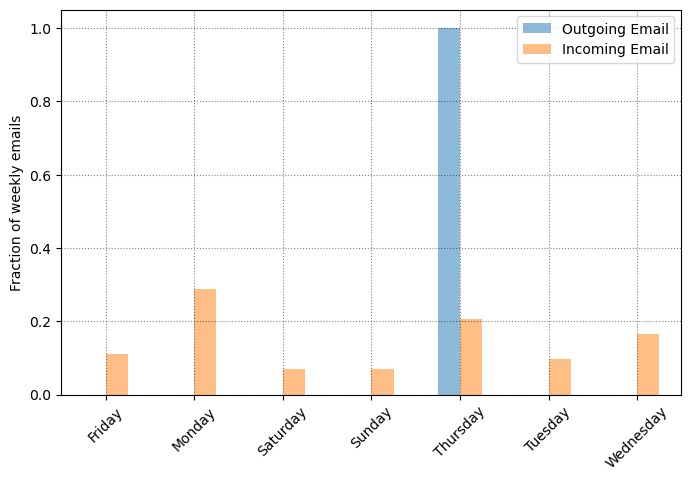

In [57]:
sdw = sent.groupby('dayofweek').size() / len(sent)
rdw = received.groupby('dayofweek').size() / len(received)
df_tmp = pd.DataFrame(data={'Outgoing Email': sdw, 'Incoming Email':rdw})
df_tmp.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.5)
plt.xlabel('');
plt.ylabel('Fraction of weekly emails');
plt.grid(ls=':', color='k', alpha=0.5)

# average email perday and hour

In [58]:
def plot_number_perday_per_year(df, ax, label=None, dt=0.3,
    **plot_kwargs):
    year = df[df['year'].isnull()]['year'].values
    T = year.max() - year.min()
    bins = int(T / dt)
    weights = 1 / (np.ones_like(year) * dt * 365.25)
    ax.hist(year, bins=bins, weights=weights, label=label, **plot_kwargs);
    ax.grid(ls=':', color='k')


# average email perhour

In [59]:
def plot_number_perdhour_per_year(df, ax, label=None, dt=1, smooth=False, weight_fun=None, **plot_kwargs):
    tod = df[df['timeofday'].isnull()]['timeofday'].values
    year = df[df['year'].isnull()]['year'].values
    Ty = year.max() - year.min()
    T = tod.max() - tod.min()
    bins = int(T / dt)
    if weight_fun is None:
        weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt)
    else:
        weights = weight_fun(df)
    if smooth:
        hst, xedges = np.histogram(tod, bins=bins, weights=weights);
        x = np.delete(xedges, -1) + 0.5*(xedges[1] - xedges[0])
        hst = ndimage.gaussian_filter(hst, sigma=0.75)
        f = interp1d(x, hst, kind='cubic')
        x = np.linspace(x.min(), x.max(), 10000)
        hst = f(x)
        ax.plot(x, hst, label=label, **plot_kwargs)
    else:
        ax.hist(tod, bins=bins, weights=weights, label=label, **plot_kwargs);
        ax.grid(ls=':', color='k')
        orientation = plot_kwargs.get('orientation')
    if orientation is None or orientation == 'vertical':
        ax.set_xlim(0, 24)
        ax.xaxis.set_major_locator(MaxNLocator(8))
        ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts,
                                                                      24))), "%H").strftime("%I %p")
                             for ts in ax.get_xticks()]);
    elif orientation == 'horizontal':
        ax.set_ylim(0, 24)
        ax.yaxis.set_major_locator(MaxNLocator(8))
        ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                             for ts in ax.get_yticks()]);

# class that plot the tme,year within time frame

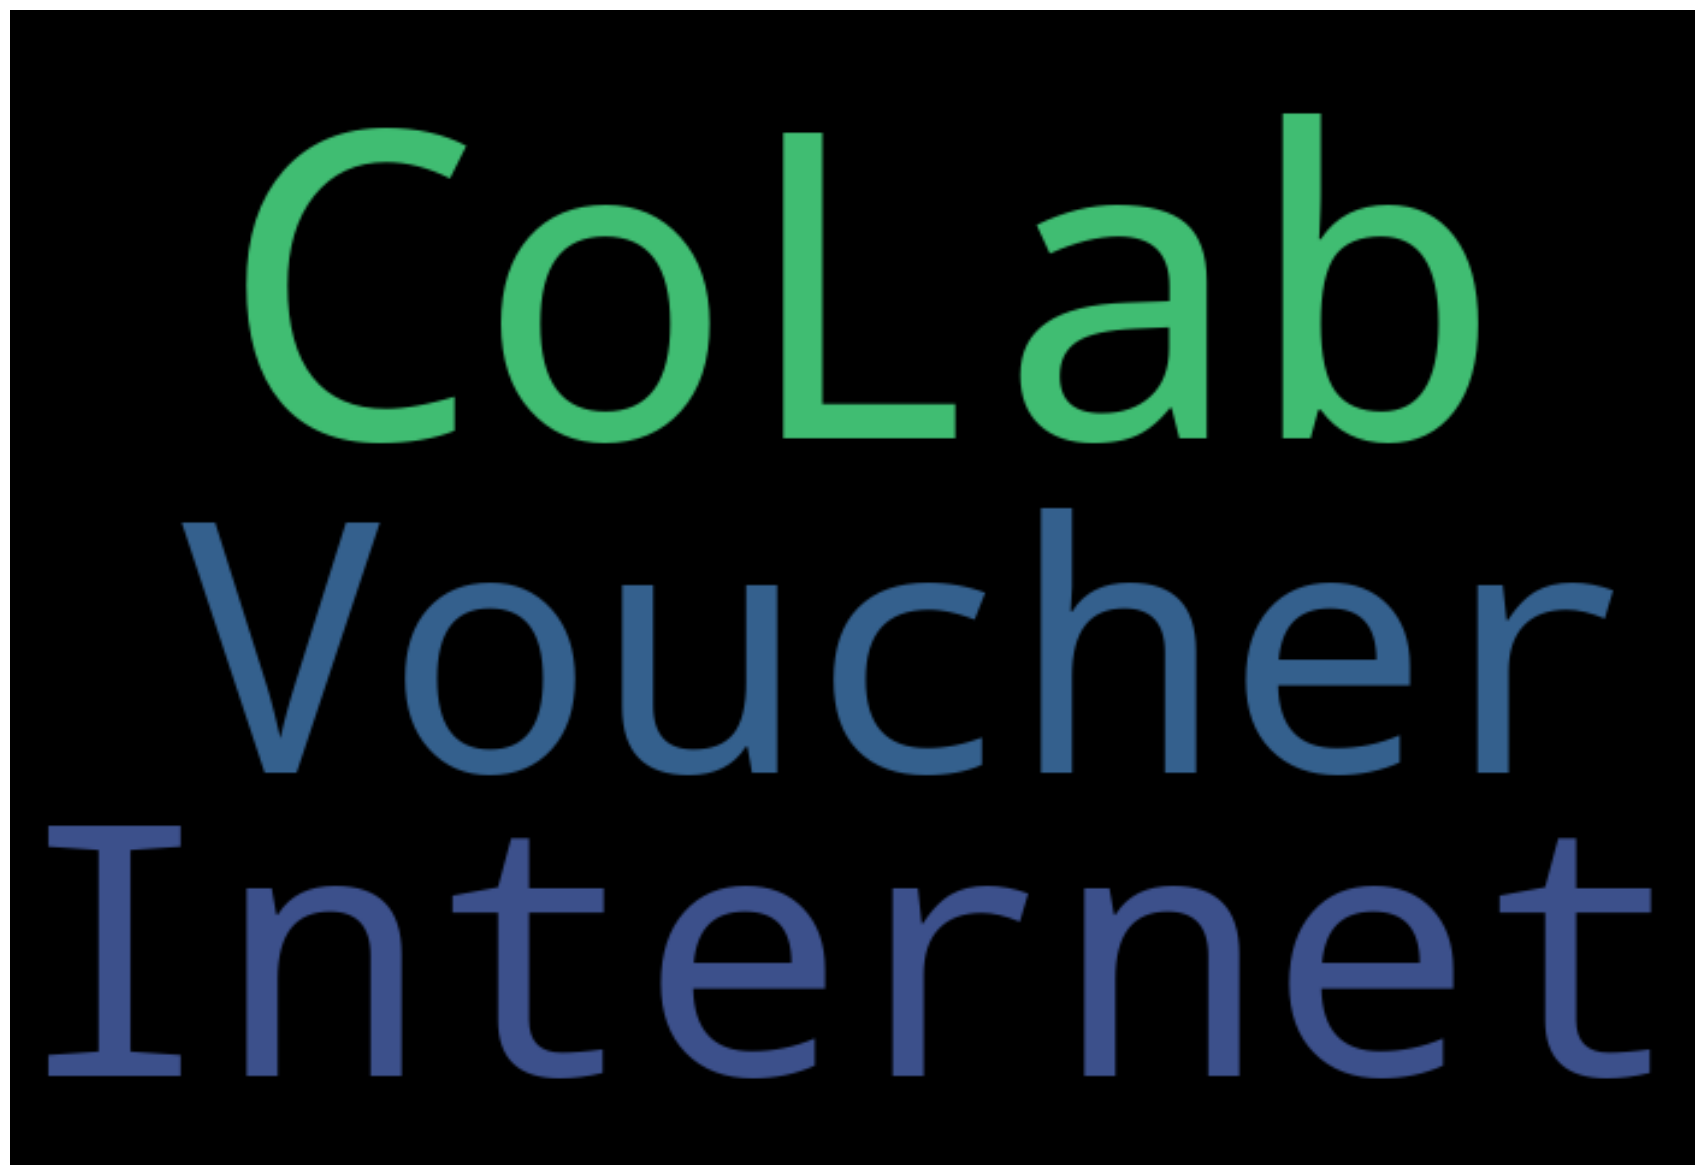

In [63]:
from wordcloud import WordCloud
df_no_arxiv = dfs[dfs['from'] != 'no-reply@arXiv.org']
text = ' '.join(map(str, sent['subject'].values))
stopwords = ['Re', 'Fwd', '3A_']
wrd = WordCloud(width=700, height=480, margin=0, collocations=False)
for sw in stopwords:
    wrd.stopwords.add(sw)
wordcloud = wrd.generate(text)
plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)